In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scotrail dataset

In [52]:
#cols_scotrail = ['Year','Period','Week','ServiceGroup', 'ProductGroup','OpJourneys', 'OpMiles', 'Unnamed']
cols_scotrail = ['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup4',
       'ProdGrp1', 'OpJourneys on selDates', 'OpMiles on selDates']
df_scotrail = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\scotrail-journey-data-2016-2022.csv', na_values='',usecols = cols_scotrail, parse_dates=True, encoding = "ISO-8859-1")
df_scotrail

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup4,ProdGrp1,OpJourneys on selDates,OpMiles on selDates
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739"
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075"
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075"
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878"
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754"
...,...,...,...,...,...,...,...
4870,2022,2022/P03,2022/W13,East Suburban,Peak,"40,874","765,995"
4871,2022,2022/P03,2022/W13,eXpress,Peak,"20,389","692,101"
4872,2022,2022/P03,2022/W13,Inter7City,Peak,"30,408","1,492,769"
4873,2022,2022/P03,2022/W13,Scenic,Peak,"13,488","448,765"


In [55]:
df_scotrail.columns

Index(['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup4',
       'ProdGrp1', 'OpJourneys on selDates', 'OpMiles on selDates'],
      dtype='object')

In [56]:
df_scotrail.columns = ['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup', 'ProductGroup', 'OpJourneys','OpMiles']
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739"
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075"
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075"
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878"
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754"


In [57]:
df_scotrail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CalendarYear    4875 non-null   int64 
 1   CalendarPeriod  4875 non-null   object
 2   CalendarWeek    4875 non-null   object
 3   ServiceGroup    4875 non-null   object
 4   ProductGroup    4875 non-null   object
 5   OpJourneys      4875 non-null   object
 6   OpMiles         4875 non-null   object
dtypes: int64(1), object(6)
memory usage: 266.7+ KB


In [39]:
df_scotrail.iloc[:,-2:]

,OpJourneys,OpMiles
0,"68,625","1,163,739"
1,"33,695","953,075"
2,"27,651","757,075"
3,"9,806","180,878"
4,"302,609","3,303,754"
...,...,...
4870,"40,874","765,995"
4871,"20,389","692,101"
4872,"30,408","1,492,769"
4873,"13,488","448,765"


In [58]:
df_scotrail["OpMiles"] = df_scotrail["OpMiles"].str.replace(',', '').astype(int)
df_scotrail["OpJourneys"] = df_scotrail["OpJourneys"].str.replace(',', '').astype(int)
df_scotrail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CalendarYear    4875 non-null   int64 
 1   CalendarPeriod  4875 non-null   object
 2   CalendarWeek    4875 non-null   object
 3   ServiceGroup    4875 non-null   object
 4   ProductGroup    4875 non-null   object
 5   OpJourneys      4875 non-null   int32 
 6   OpMiles         4875 non-null   int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 228.6+ KB


In [59]:
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,68625,1163739
1,2016,2016/P01,2016/W01,eXpress,Commuter,33695,953075
2,2016,2016/P01,2016/W01,Inter7City,Commuter,27651,757075
3,2016,2016/P01,2016/W01,Scenic,Commuter,9806,180878
4,2016,2016/P01,2016/W01,West Suburban,Commuter,302609,3303754


In [60]:
### Finding unique values

In [27]:
# 13 calendar periods
df_scotrail.CalendarPeriod.unique()

array(['2016/P01', '2016/P02', '2016/P03', '2016/P04', '2016/P05',
       '2016/P06', '2016/P07', '2016/P08', '2016/P09', '2016/P10',
       '2016/P11', '2016/P12', '2016/P13', '2017/P01', '2017/P02',
       '2017/P03', '2017/P04', '2017/P05', '2017/P06', '2017/P07',
       '2017/P08', '2017/P09', '2017/P10', '2017/P11', '2017/P12',
       '2017/P13', '2018/P01', '2018/P02', '2018/P03', '2018/P04',
       '2018/P05', '2018/P06', '2018/P07', '2018/P08', '2018/P09',
       '2018/P10', '2018/P11', '2018/P12', '2018/P13', '2019/P01',
       '2019/P02', '2019/P03', '2019/P04', '2019/P05', '2019/P06',
       '2019/P07', '2019/P08', '2019/P09', '2019/P10', '2019/P11',
       '2019/P12', '2019/P13', '2020/P01', '2020/P02', '2020/P03',
       '2020/P04', '2020/P05', '2020/P06', '2020/P07', '2020/P08',
       '2020/P09', '2020/P10', '2020/P11', '2020/P12', '2020/P13',
       '2021/P01', '2021/P02', '2021/P03', '2021/P04', '2021/P05',
       '2021/P06', '2021/P07', '2021/P08', '2021/P09', '2021/P

In [31]:
# 52 weeks in a year
df_scotrail.CalendarWeek.unique()

array(['2016/W01', '2016/W02', '2016/W03', '2016/W04', '2016/W05',
       '2016/W06', '2016/W07', '2016/W08', '2016/W09', '2016/W10',
       '2016/W11', '2016/W12', '2016/W13', '2016/W14', '2016/W15',
       '2016/W16', '2016/W17', '2016/W18', '2016/W19', '2016/W20',
       '2016/W21', '2016/W22', '2016/W23', '2016/W24', '2016/W25',
       '2016/W26', '2016/W27', '2016/W28', '2016/W29', '2016/W30',
       '2016/W31', '2016/W32', '2016/W33', '2016/W34', '2016/W35',
       '2016/W36', '2016/W37', '2016/W38', '2016/W39', '2016/W40',
       '2016/W41', '2016/W42', '2016/W43', '2016/W44', '2016/W45',
       '2016/W46', '2016/W47', '2016/W48', '2016/W49', '2016/W50',
       '2016/W51', '2016/W52', '2017/W01', '2017/W02', '2017/W03',
       '2017/W04', '2017/W05', '2017/W06', '2017/W07', '2017/W08',
       '2017/W09', '2017/W10', '2017/W11', '2017/W12', '2017/W13',
       '2017/W14', '2017/W15', '2017/W16', '2017/W17', '2017/W18',
       '2017/W19', '2017/W20', '2017/W21', '2017/W22', '2017/W

In [30]:
df_scotrail.ProductGroup.unique()

array(['Commuter', 'Off-Peak', 'Peak'], dtype=object)

In [176]:
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,68625,1163739
1,2016,2016/P01,2016/W01,eXpress,Commuter,33695,953075
2,2016,2016/P01,2016/W01,Inter7City,Commuter,27651,757075
3,2016,2016/P01,2016/W01,Scenic,Commuter,9806,180878
4,2016,2016/P01,2016/W01,West Suburban,Commuter,302609,3303754


In [64]:
df_scotrail.to_csv('scotrail_cleaned.csv')

## Skyscan dataset

In [145]:
df_skyscan = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscanner-data.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")
df_skyscan

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\3684984604.py:1: DtypeWarning: Columns (12,13,14,15,17,19,20,21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_skyscan = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscanner-data.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")


,dt,search_guid,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,...,amount,unit,operating_carrier,booking_panel_option_guid,booking_type,partner,partner_currency,partner_price,redirect,redirect_platform
0,2019-05-06,791993e8-c93f-4617-bf3c-3f434e923529,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,...,83000.0,CENTI,-32302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-02,8506e372-50b8-4a31-ae69-1ff292b0d941,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,...,26200.0,CENTI,-32528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-06,54552252-3b91-412f-89aa-8625523e3c33,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,...,18600.0,CENTI,-32132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-06,175091f5-c294-4582-8285-1f32ac56f5ce,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,...,58100.0,CENTI,-32132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-02,270dc4a8-6983-4ce3-955f-2387ad00c361,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,...,8600.0,CENTI,-32356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,4cf1ff8f-b172-4743-ad2e-ee38c1aca4ef,REDIRECT,gtcz,CZK,782600.0,NaN,NaN
182001,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,1e213141-217a-4257-a753-3242e4936ba6,REDIRECT,ctcz,CZK,839800.0,NaN,NaN
182002,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,6885347a-22e2-4183-a09e-caf03ffe1a31,REDIRECT,edcz,CZK,742000.0,NaN,NaN
182003,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,7cb8c500-47b0-4e33-b987-52e2ee912e17,REDIRECT,pecz,CZK,782100.0,NaN,NaN


In [92]:
df_skyscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182005 entries, 0 to 182004
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dt                          182005 non-null  object 
 1   search_guid                 182005 non-null  object 
 2   device_type                 182005 non-null  object 
 3   search_origin               182005 non-null  object 
 4   search_destination          182005 non-null  object 
 5   search_route                182005 non-null  object 
 6   search_adult_count          157378 non-null  float64
 7   search_child_count          157378 non-null  float64
 8   search_cabin_class          157378 non-null  object 
 9   search_type                 182005 non-null  object 
 10  search_departure_date       182005 non-null  object 
 11  search_arrival_date         97386 non-null   object 
 12  search_results_page_guid    129480 non-null  object 
 13  search_results

In [112]:
df_skyscan.columns

Index(['dt', 'search_guid', 'device_type', 'search_origin',
       'search_destination', 'search_route', 'search_adult_count',
       'search_child_count', 'search_cabin_class', 'search_type',
       'search_departure_date', 'search_arrival_date',
       'search_results_page_guid', 'search_results_option_guid',
       'is_marked_as_eco_option', 'currency', 'amount', 'unit',
       'operating_carrier', 'booking_panel_option_guid', 'booking_type',
       'partner', 'partner_currency', 'partner_price', 'redirect',
       'redirect_platform'],
      dtype='object')

In [153]:
df_skyscan = df_skyscan[['dt', 'device_type', 'search_origin',
       'search_destination', 'search_route', 'search_adult_count',
       'search_child_count', 'search_cabin_class', 'search_type',
       'search_departure_date', 'search_arrival_date',      
       'is_marked_as_eco_option', 'currency', 'amount', 'unit',
       'operating_carrier', 'booking_type']]

In [154]:
df_skyscan["dt"] = pd.to_datetime(df_skyscan.loc[:, 'dt'], format='%Y-%m-%d')
df_skyscan["search_arrival_date"] = pd.to_datetime(df_skyscan.loc[:, 'search_arrival_date'], format='%Y-%m-%d')

df_skyscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182005 entries, 0 to 182004
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   dt                       182005 non-null  datetime64[ns]
 1   device_type              182005 non-null  object        
 2   search_origin            182005 non-null  object        
 3   search_destination       182005 non-null  object        
 4   search_route             182005 non-null  object        
 5   search_adult_count       157378 non-null  float64       
 6   search_child_count       157378 non-null  float64       
 7   search_cabin_class       157378 non-null  object        
 8   search_type              182005 non-null  object        
 9   search_departure_date    182005 non-null  object        
 10  search_arrival_date      97386 non-null   datetime64[ns]
 11  is_marked_as_eco_option  125678 non-null  object        
 12  currency        

In [197]:
df_scan_clean = df_skyscan.loc[~((df_skyscan.search_departure_date.str.startswith('1478'))|(df_skyscan.search_departure_date.str.startswith('1479')))]

In [198]:
df_scan_clean

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,is_marked_as_eco_option,currency,amount,unit,operating_carrier,booking_type
0,2019-05-06,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,2019-06-14 00:00:00,NaT,False,BRL,83000.0,CENTI,-32302.0,NaN
1,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-07-07 00:00:00,2022-07-10,False,GBP,26200.0,CENTI,-32528.0,NaN
2,2019-05-06,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,2020-04-09 00:00:00,2020-04-13,False,GBP,18600.0,CENTI,-32132.0,NaN
3,2019-05-06,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,2019-08-06 00:00:00,2019-08-13,False,EUR,58100.0,CENTI,-32132.0,NaN
4,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-05-19 00:00:00,2022-05-21,True,GBP,8600.0,CENTI,-32356.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182001,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182002,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182003,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT


In [199]:
df_clean["search_departure_date"] = pd.to_datetime(df_scan_clean.loc[:, 'search_departure_date'], format='%Y-%m-%d')
df_clean

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,is_marked_as_eco_option,currency,amount,unit,operating_carrier,booking_type
0,2019-05-06,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,2019-06-14,NaT,False,BRL,83000.0,CENTI,-32302.0,NaN
1,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-07-07,2022-07-10,False,GBP,26200.0,CENTI,-32528.0,NaN
2,2019-05-06,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,2020-04-09,2020-04-13,False,GBP,18600.0,CENTI,-32132.0,NaN
3,2019-05-06,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,2019-08-06,2019-08-13,False,EUR,58100.0,CENTI,-32132.0,NaN
4,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-05-19,2022-05-21,True,GBP,8600.0,CENTI,-32356.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182001,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182002,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182003,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT


In [205]:
df_clean.search_origin.value_counts().head(10)

LOND    21582
LHR      5260
LGW      3762
DUB      3674
BHX      3636
AMS      2779
BRS      2704
BELF     2675
MAN      2569
MAD      2477
Name: search_origin, dtype: int64

In [202]:
df_clean.is_marked_as_eco_option.value_counts()

False    115715
True       9963
Name: is_marked_as_eco_option, dtype: int64

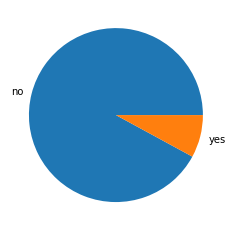

In [203]:
# Visualising the Eco option.

mylabels =df_clean.is_marked_as_eco_option.value_counts() 
plt.pie(df_clean.is_marked_as_eco_option.value_counts(), labels = ['no', 'yes'])
plt.show() 

In [200]:
df_clean.to_csv('skyscan_cleaned.csv')